### Two Way ANOVA

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [8]:
df = pd.DataFrame({'water':np.repeat(['Daily','Weekly'], 15),
                   'sun': np.tile(np.repeat(['Low', 'Medium', 'High'], 5), 2),
                   'Height': [ 5,3,5,5,5,3,6,7,6,4,
                              2,2,2,2,3,6,5,4,3,5,
                              4,4,4,4,5,6,5,5,6,4]})
df.sample(15)

,water,sun,Height
18,Weekly,Low,3
6,Daily,Medium,6
0,Daily,Low,5
16,Weekly,Low,5
5,Daily,Medium,3
7,Daily,Medium,7
28,Weekly,High,6
24,Weekly,Medium,5
14,Daily,High,3
19,Weekly,Low,5


<AxesSubplot: xlabel='sun', ylabel='Height'>

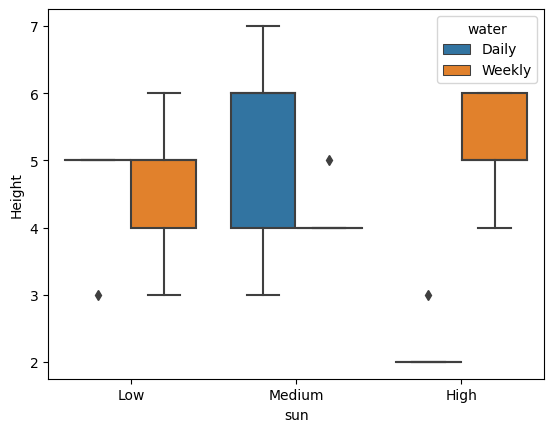

In [10]:
sns.boxplot(data=df, x='sun', y='Height', hue='water')

In [11]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [12]:
# Test One
md = ols('Height ~ C(sun) + C(water) + C(sun):C(water)', data=df).fit()
aov_table = sm.stats.anova_lm(md, type=2)
print(aov_table)

                   df     sum_sq    mean_sq          F    PR(>F)
C(sun)            2.0   6.066667   3.033333   3.084746  0.064227
C(water)          1.0   3.333333   3.333333   3.389831  0.077995
C(sun):C(water)   2.0  21.666667  10.833333  11.016949  0.000403
Residual         24.0  23.600000   0.983333        NaN       NaN


In [13]:
# Test Two
import pingouin as pg
anov = pg.anova(data=df, dv='Height', between=['sun','water'])
print(anov)

        Source         SS  DF         MS          F     p-unc       np2
0          sun   6.066667   2   3.033333   3.084746  0.064227  0.204494
1        water   3.333333   1   3.333333   3.389831  0.077995  0.123762
2  sun * water  21.666667   2  10.833333  11.016949  0.000403  0.478645
3     Residual  23.600000  24   0.983333        NaN       NaN       NaN


In [16]:
# Performing tukey
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(df['Height'], df['sun'])
tukey_table = mc.tukeyhsd(alpha=0.05)
print(tukey_table)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  High    Low      0.9 0.3068 -0.5877 2.3877  False
  High Medium      1.0 0.2362 -0.4877 2.4877  False
   Low Medium      0.1 0.9848 -1.3877 1.5877  False
---------------------------------------------------
